In [30]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

url = r'C:\Users\Boyan1\Documents\Largest-Companies - 25apr(2024)TTM.csv'
dataset = pd.read_csv(url,encoding='latin-1')
dataset.head()

,Rank,Name,Sales,Profit,Assets,Market Value,Industry,Founded,Headquarters,Country,CEO,Employees
0,1,JPMorgan Chase,252.9,50.0,4090.7,588.1,Banking and Financial Services,2000.0,New York- New York,United States,Jamie Dimon,186751.0
1,2,Berkshire Hathaway,369.0,73.4,1070.0,899.1,Conglomerate,1839.0,Omaha- Nebraska,United States,Warren Edward Buffett,396500.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),489.1,116.9,661.5,1919.3,Construction- Chemicals- Raw Materials,1933.0,Dhahran,Saudi Arabia,Amin bin Hasan Al-Nasser,70000.0
3,4,ICBC,223.8,50.4,6586.0,215.2,Banking and Financial Services,1984.0,Beijing,China,Wang Jingwu,427587.0
4,5,Bank of America,183.3,25.0,3273.8,307.3,Banking and Financial Services,1904.0,Charlotte- North Carolina,United States,Brian T. Moynihan,166140.0


In [31]:
x = dataset.iloc[:, [3,5]].values
np.set_printoptions(suppress=False, precision=2)
print(x)

[[5.00e+01 5.88e+02]
 [7.34e+01 8.99e+02]
 [1.17e+02 1.92e+03]
 ...
 [1.58e-01 2.60e+00]
 [1.35e-01 1.00e+01]
 [8.13e-01 9.00e+00]]


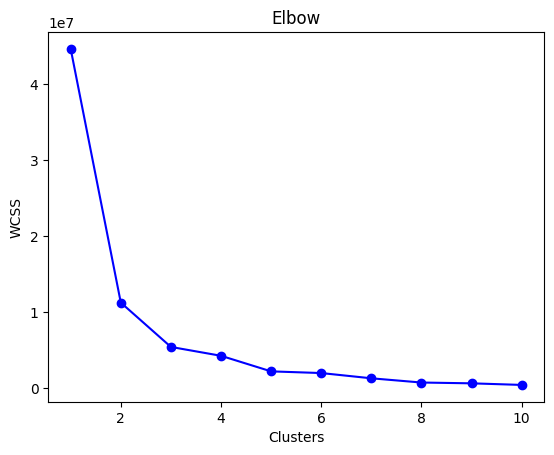

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, 'bo-')
plt.title("Elbow")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [46]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)

dataset["Label"] = kmeans.labels_
dataset.head()

,Rank,Name,Sales,Profit,Assets,Market Value,Industry,Founded,Headquarters,Country,CEO,Employees,Label
0,1,JPMorgan Chase,252.9,50.0,4090.7,588.1,Banking and Financial Services,2000.0,New York- New York,United States,Jamie Dimon,186751.0,2
1,2,Berkshire Hathaway,369.0,73.4,1070.0,899.1,Conglomerate,1839.0,Omaha- Nebraska,United States,Warren Edward Buffett,396500.0,2
2,3,Saudi Arabian Oil Company (Saudi Aramco),489.1,116.9,661.5,1919.3,Construction- Chemicals- Raw Materials,1933.0,Dhahran,Saudi Arabia,Amin bin Hasan Al-Nasser,70000.0,1
3,4,ICBC,223.8,50.4,6586.0,215.2,Banking and Financial Services,1984.0,Beijing,China,Wang Jingwu,427587.0,3
4,5,Bank of America,183.3,25.0,3273.8,307.3,Banking and Financial Services,1904.0,Charlotte- North Carolina,United States,Brian T. Moynihan,166140.0,3


Text(0, 0.5, 'M-Cap')

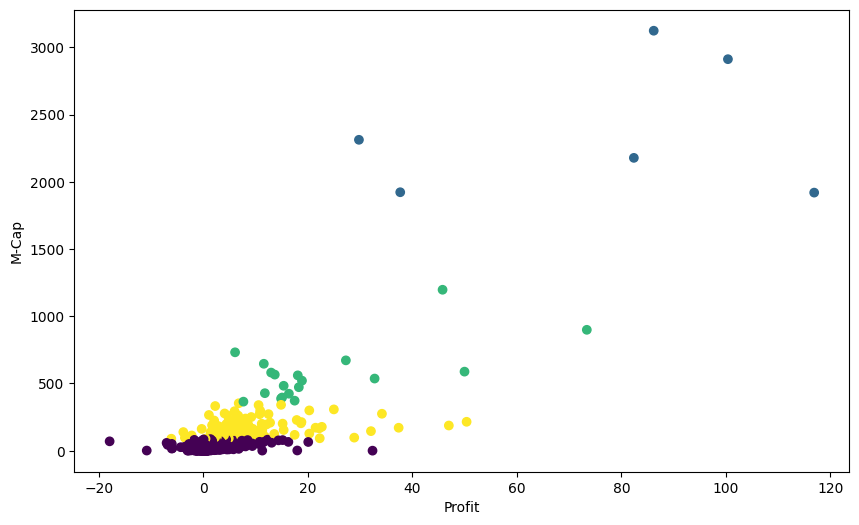

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans)
plt.xlabel("Profit")
plt.ylabel("M-Cap")